In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
plt.style.use('seaborn')

## Data Preparation 

In [58]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.4]])

mean_02 = np.array([3,4.5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]]) 

# Normal Distribution

dist1 = np.random.multivariate_normal(mean_01,cov_01,400)
dist2 = np.random.multivariate_normal(mean_02,cov_02,400)

# each distribution has 2 features. x1,x2
print(dist1.shape) 
print(dist2.shape)

(400, 2)
(400, 2)


### Data Visualisation 

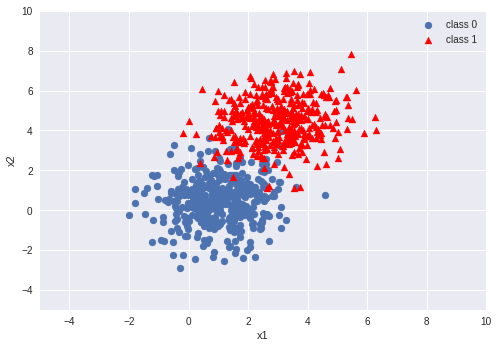

In [59]:
plt.scatter(dist1[:,0],dist1[:,1],label='class 0')
plt.scatter(dist2[:,0],dist2[:,1],color='r',marker='^',label='class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


In [60]:
total = dist1.shape[0] + dist2.shape[0]
print(total)

800


In [61]:
data = np.zeros((total,3))
print(data.shape)

(800, 3)


In [62]:
data[:400,:-1] = dist1
data[400:,:-1] = dist2

#-1 means only the last item in the array
data[400:,-1] = 1

print(data[:5,:])
print(data.shape)

[[0.83946077 1.26771722 0.        ]
 [0.29462766 1.20276583 0.        ]
 [0.32875879 1.74808966 0.        ]
 [1.16891702 1.62835419 0.        ]
 [1.03706209 2.03923962 0.        ]]
(800, 3)


In [63]:
np.random.shuffle(data)
print(data[:5,:])

[[2.58921932 0.6190605  0.        ]
 [2.31378007 3.45720971 1.        ]
 [0.30904215 0.49146386 0.        ]
 [1.07961304 1.60231921 0.        ]
 [3.73841969 4.58046191 1.        ]]


### Normalising the data 

In [64]:
u = np.mean(data[:,:-1],axis=0)
sigma = np.std(data[:,:-1],axis=0)

data[:,:-1] = ( data[:,:-1]-u )/sigma
print(data.shape)

(800, 3)


In [65]:
ones = np.ones( (data.shape[0],1),dtype='float32' )
final_data = np.hstack((ones,data))
print(final_data.shape)
print(final_data[:5,:])

(800, 4)
[[ 1.          0.40751139 -0.80851473  0.        ]
 [ 1.          0.21519288  0.4291042   1.        ]
 [ 1.         -1.18456477 -0.86415522  0.        ]
 [ 1.         -0.64653309 -0.37974953  0.        ]
 [ 1.          1.20991153  0.91891572  1.        ]]


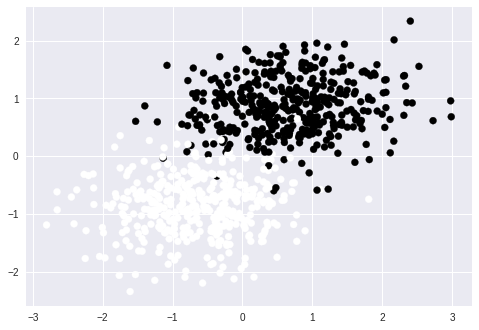

In [66]:
plt.scatter(final_data[:,1],final_data[:,2],c=final_data[:,3])
plt.show()

#### Splitting data into training and testing data 

In [70]:
split = int(0.8*total)
print(split)

640


In [72]:
# :-1 means everything except last item in the array 
#-1 means only the last item in the array

X_train = final_data[:split,:-1]
Y_train = final_data[:split,-1]

X_test = final_data[split:,:-1]
Y_test = final_data[split:,-1]


In [76]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(640, 3)
(640,)
(160, 3)
(160,)


### Further steps 
- generate a decision boundry 
- having equation of form theta0 + theta1*x1 + theta2*x2
- find the optimal value of parameters (theta-0,1,2)
- using gradient descent to miniize our loss function
- loss = -log(likelihood)
 

## Logistic Regression functions

In [82]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def hypothesis(x,theta):
    h =  np.dot(x,theta)
    return sigmoid(h)


def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += ( Y[i]*np.log2(y_) + (1-Y[i])*np.log2(1-y_) )
        
    return total_error/m  # Average error


def gradient(X,Y,theta):
    
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        grad += (Y[i]-y_)*x

    return grad/m


def gradientDescent(X,Y,learning_rate=0.5,max_iters=500):
    
    theta = np.zeros((X.shape[1],1))
    error_list = []
    
    for i in range(max_iters):
        grad = gradient(X,Y,theta)
        theta = theta + learning_rate*grad
        e = error(X,Y,theta)
        error_list.append(e)
        
    return error_list,theta    


In [83]:
error_list,theta = gradientDescent(X_train,Y_train)

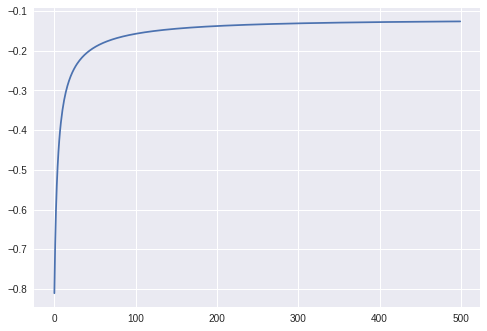

In [84]:
plt.plot(error_list)
plt.show()

In [85]:
def predict(xtest,theta):
    
    prob = hypothesis(xtest,theta)
    if prob<=0.5:
        return 0
    else:
        return 1

In [87]:
Y_pred = np.array( [ predict(X_test[i],theta) for i in range(X_test.shape[0]) ] )

In [88]:
Y_test = np.array(Y_test,dtype='int32')

In [90]:
print("Test Accuracy ")
np.sum( (Y_pred==Y_test)*100/Y_test.shape[0] )

Test Accuracy 


98.125

In [93]:
print(theta)
print(theta.shape)

[[0.0555377 ]
 [1.60333174]
 [5.18662955]]
(3, 1)


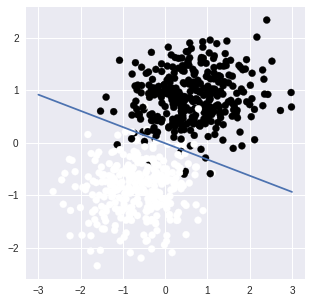

In [95]:
plt.figure(figsize=(5,5))
x = np.linspace(-3,3,10)
y = -( theta[0][0]*1 + theta[1][0]*x ) / theta[2][0]
plt.scatter(X_train[:,1],X_train[:,2],c=Y_train)
plt.plot(x,y)